# regplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.regplot()` библиотеки *seaborn* используется для построения графиков регрессии, которые показывают отношения между двумя переменными с наложением линии регрессии. Функция `sns.regplot()` - это, по сути, упрощенный вариант функции `sns.lmplot()`.

В отличие от `sns.lmplot()`, `sns.regplot()` не поддерживает создание сеток графиков с использованием категориальных переменных. Но в отличие от `sns.lmplot()`, в арсенале функции `sns.regplot()` имеется параметр `ax`, позволяющий легко интегрироваться с графиками, построенными с использованием функционала библиотеки *matplotlib*.

Основные параметры:
- `data`: DataFrame, массив;
- `x, y`: переменные для построения графика. X и Y задают координаты;
- `x_estimator`: позволяет задать функцию для оценки центрального значения в каждой группе значений по оси X;
- `x_bins`: разбивает ось X на равные интервалы (бины) и отображает средние значения для каждого из этих интервалов;
- `x_ci`: задаёт доверительный интервал для центрального значения по оси X  (по умолчанию x_ci='ci');
- `scatter`: определяет рисовать ли диаграмму рассеяния (по умолчанию scatter=True);
- `fit_reg`: если True (по умолчанию), на графике отображается регрессионная линия;
- `ci`: доверительный интервал для линии регрессии (по умолчанию ci=95). Если None, доверительный интервал не строится.
- `n_boot`: количество выборок для вычисления доверительного интервала (по умолчанию n_boot=1000);
- `seed`: задает начальное значение для генератора случайных чисел, что обеспечивает повторяемость результатов при многократном запуске кода;
- `order`: используется для указания степени полинома, который будет использоваться для построения регрессионной линии. По умолчанию order=1 - это означает, что линия регрессии будет прямой;
- `logistic`: если True, то рисуется линия логистической регрессии вместо линейной (по умолчанию logistic=False);
- `lowess`: если True, то рисуется линия lowess регрессии (локально взвешенная регрессия) вместо линейной (по умолчанию lowess=False);
- `robust`: если True, то рисуется линия robust регрессии (устойчивая регрессия) вместо линейной (по умолчанию robust=False);
- `truncate`: если True (по умолчанию), регрессионная линия обрезается до границ данных по оси X;
- `x_jitter`: величина, на которую будут случайно смещены значения по оси X для визуализации распределения точек с одинаковыми X-значениями;
- `y_jitter`: величина, на которую будут случайно смещены значения по оси Y для визуализации распределения точек с одинаковыми Y-значениями;
- `ax`: позволяет указать оси (axes) matplotlib, на которых будет построен график.

Работу функции `sns.regplot()` рассмотрим на примере датасета `'mpg'`. Загрузим этот датасет, удалив пропущенные значения:

In [3]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Содержание датафрейма:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля.

Построим график `regplot`, в котором по оси абсцисс будут располагаться значения мощности автомобиля, а по оси ординат - время разгона с 0 до 60 миль в час, измеренное в секундах:

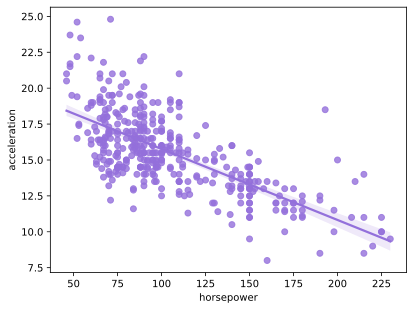

In [5]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple');

Результат вывода аналогичен построению графика lmplot.

Далее давайте рассмотрим работу некоторых параметров этой функции.

Параметр `scatter=False` позволяет не отображать диаграмму рассеяния на графике:

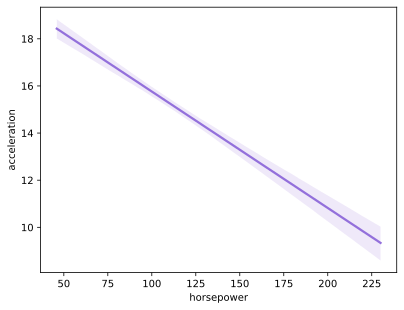

In [6]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple',
            scatter=False);


Применив параметр `ci=None`, на диаграмме не будет отражаться доверительный интервал:

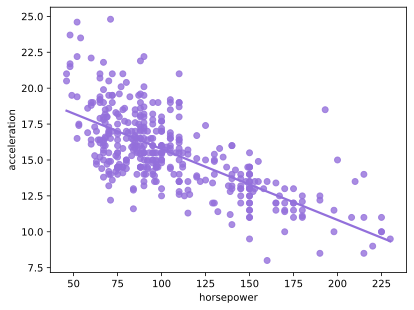

In [7]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple',
            ci=None);

Параметр `order` функции `sns.regplot()` используется для задания степени полиномиальной регрессии, которая будет применена к данным. По умолчанию `sns.regplot()` строит линейную регрессию (полином первой степени), но с помощью параметра `order` можно указать, что вы хотите построить полином более высокой степени.

Например, построим полиномиальную регрессию второй степени:

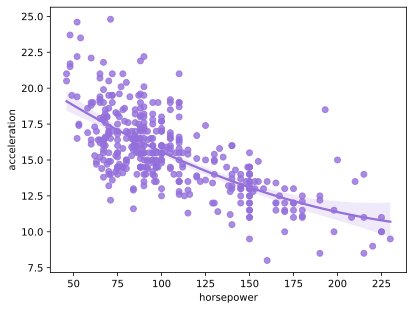

In [8]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple',
            order=2);

Как и функция `sns.lmplot()`, `sns.regplot()` поддерживает возможность отображать на графики линии регрессии нескольких типов: `lowess`, `robust`, `logistic`. 

Например:

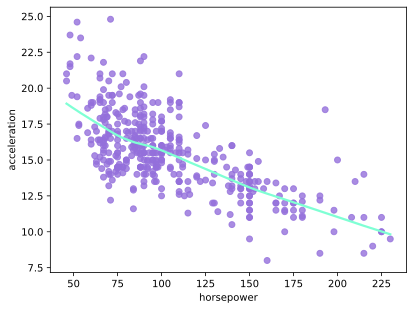

In [9]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple',
            line_kws={'color': 'Aquamarine'},
            lowess=True);

Отметим также, что функция `sns.regplot()` не работает с категориальными переменными. Но наш датафрейм содержит столбец 'cylinders', который имеет числовые значения, и при этом их можно отнести и к категориальным данным. Построим график `regplot`, используя данные из этого столбца:

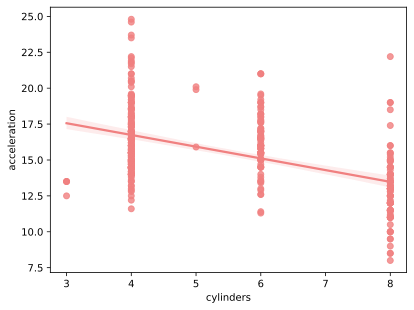

In [10]:
sns.regplot(data=df, x='cylinders', y='acceleration',
            color='LightCoral');

В данном случае можно воспользоваться параметром `x_jitter`, который придаст точкам небольшое случайное смещение, что позволит снизить эффект наложения и сделать визуализацию данных более читабельной:

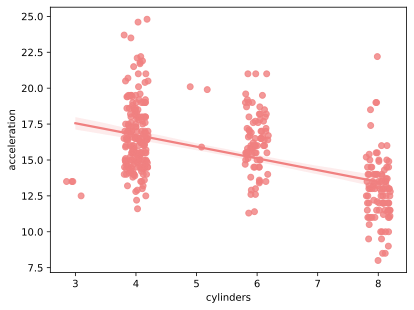

In [11]:
sns.regplot(data=df, x='cylinders', y='acceleration',
            color='LightCoral',
            x_jitter=0.2);

В отличие от `sns.lmplot()`, функция `sns.regplot()` имеет в своём арсенале параметр `ax`, позволящий указать оси *matplotlib*, на которых будет построен график. Это полезно, когда вы хотите интегрировать regplot в существующий график или разместить несколько графиков на одной фигуре.

Например, у есть некоторый составной график, построенный с применением функций библиотеки *matplotlib*, и на который хотим добавить линию регрессии:

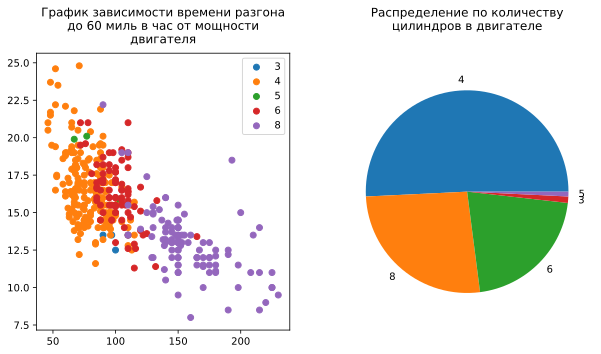

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Первый график
groups = df.groupby('cylinders')
for name, group in groups:
    ax1.scatter(group['horsepower'], group['acceleration'], label=name)
ax1.legend()

# Второй график
ax2.pie(data=df, x=df['cylinders'].value_counts(),
          labels=df['cylinders'].value_counts().index)

# Манипуляции для разбиения заголовков на несколько строк и их отражения на графике
import textwrap
long_title1 ='График зависимости времени разгона до 60 миль в час от мощности двигателя'
wrapped_title1 = "\n".join(textwrap.wrap(long_title1, width=35))
ax1.set_title(wrapped_title1, pad=10)

long_title2 ='Распределение по количеству цилиндров в двигателе'
wrapped_title2 = "\n".join(textwrap.wrap(long_title2, width=35))
ax2.set_title(wrapped_title2, pad=35)

plt.show()

Для этого параметру ax следует передать наименование объекта, на котором нужно отобразить линию регрессии. В нашем случае это подграфик, имеющий наименовние `ax1`:

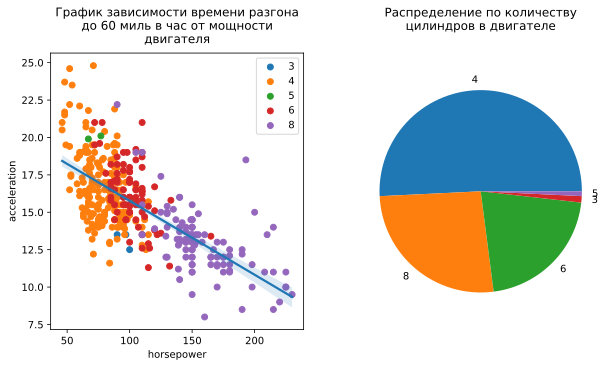

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Первый график с группировкой для отображения точек разным цветом, в зависимости от количества цилиндров
groups = df.groupby('cylinders')
for name, group in groups:
    ax1.scatter(group['horsepower'], group['acceleration'], label=name)
ax1.legend()

# Второй график
ax2.pie(data=df, x=df['cylinders'].value_counts(),
          labels=df['cylinders'].value_counts().index)

# Добавление линии регрессии с доверительным интервалом на первый график
sns.regplot(data=df, x='horsepower', y='acceleration',
            scatter=False,
            ax=ax1)

# Манипуляции для разбиения заголовков на несколько строк и их отражения на графике
import textwrap
long_title1 ='График зависимости времени разгона до 60 миль в час от мощности двигателя'
wrapped_title1 = "\n".join(textwrap.wrap(long_title1, width=35))
ax1.set_title(wrapped_title1, pad=10)

long_title2 ='Распределение по количеству цилиндров в двигателе'
wrapped_title2 = "\n".join(textwrap.wrap(long_title2, width=35))
ax2.set_title(wrapped_title2, pad=35)

plt.show()

Или, например, на объекте `ax1` целиком отобразим график regplot библиотеки *seaborn*:

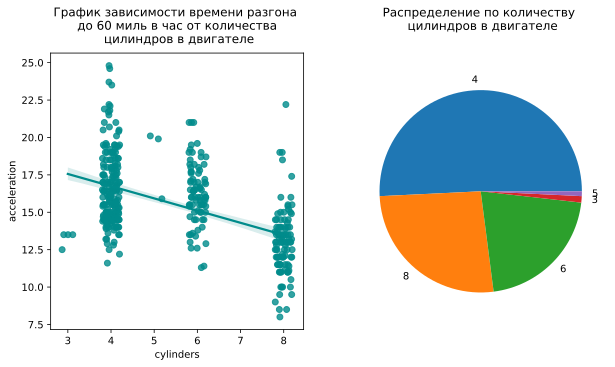

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Первый график
sns.regplot(data=df, x='cylinders', y='acceleration',
            color='DarkCyan',
            x_jitter=0.2,
            ax=ax1)

# Второй график
ax2.pie(data=df, x=df['cylinders'].value_counts(),
        labels=df['cylinders'].value_counts().index)

ax1.set_title('График зависимости времени разгона \n до 60 миль в час от количества \n цилиндров в двигателе', 
              pad=10)
ax2.set_title('Распределение по количеству \n цилиндров в двигателе', pad=35)

plt.show()

Стоит также добавить, что `sns.regplot()` не имеет параметра `hue`, который есть у `sns.lmplot()`. И поэтому если нужно нарисовать несколько линий регрессии на одном графике, то прийдётся выбирать либо использовать `sns.lmplot()` и затем каким-то образом скелить с другим графиком, либо итерировать по заранее выделенным группам и наносить их с помощью `sns.regplot()`.